# Семестровый проект

Для участия в хакатоне по дата-журналистике было нужно собрать датасет из приговоров по 108 статье УК РФ — превышение пределенов необходимой самообороны. <a href= "https://108st.tilda.ws" >108st.tilda.ws</a>

Для этого распарсил sudact.ru, после чего извлек текст из страниц и лемматизировал его используя nltk. Здесь анализирую полученные данные.

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 7]

In [1]:
import pickle
with open("new_data.pickle", "rb") as fp:
    a = pickle.load(fp)

In [18]:
import pandas as pd
df = pd.DataFrame(a)

In [19]:
df.head()

,0,1,2,3,4
0,Приговор № 1-135/2013 от 13 ноября 2013 г.,https://sudact.ru/regular/doc/6gylVQdigFbX/?pa...,2013-11-13,"<td class=""h-col1 h-col1-inner3""><div class=""b...",приговор № 1 135 2013 13 ноябрь 2013 г изберба...
1,Приговор № 1-219/2013 от 20 июня 2013 г.,https://sudact.ru/regular/doc/YNXvvZSVLdW5/?pa...,2013-06-20,"<td class=""h-col1 h-col1-inner3""><div class=""b...",приговор № 1 219 2013 20 июнь 2013 г иркутский...
2,Приговор № 1-221/2012 1-34/13 1-34/2013 1-34/2...,https://sudact.ru/regular/doc/HkDdeAgmiXZb/?pa...,2013-06-14,"<td class=""h-col1 h-col1-inner3""><div class=""b...",приговор № 1 221 2012 1 34 13 1 34 2013 1 34 2...
3,Приговор № 1-203/2013 от 9 декабря 2013 г.,https://sudact.ru/regular/doc/9y3jwyNxviZX/?pa...,2013-12-09,"<td class=""h-col1 h-col1-inner3""><div class=""b...",приговор № 1 203 2013 9 декабрь 2013 г мценски...
4,Приговор № 1-504/2013 от 23 декабря 2013 г. по...,https://sudact.ru/regular/doc/6jDuzwMm5Qbp/?pa...,2013-12-23,"<td class=""h-col1 h-col1-inner3""><div class=""b...",приговор № 1 504 2013 23 декабрь 2013 г дело №...


In [79]:
df[4][0]

'приговор № 1 135 2013 13 ноябрь 2013 г избербашский городской суд республика дагестан )   -  уголовный уг дело № 1 135 2013 г приговор имя российский федерация г избербаш 13 ноябрь 2013 г судья избербашский городской суд рд нурбаганд н м участие государственный обвинитель помощник прокурор г избербаш бакаев ш подсудимый арсланов м защитник лицо адвокат айгумов м представлять удостоверение № ордер № дд мм гггг год секретарь муртузалиевый л ю рассматривать открытый судебный заседание г избербаш уголовный дело обвинение арсланов м дд мм гггг год рождение уроженец дасср , ,  гражданин рф средний образование женатый работать проживать задержание адрес рд , ,  судить совершение преступление предусмотренный ч 3 ст 30 ч 1 ст 105 ук рф устанавливать дд мм гггг около 13 час 30 минута подсудимый арсланов м ход ссора возникать из-за длительный неприязненный отношение находиться квартира располагать адрес : ,  осознавать общественный опасность свой действие предвидеть возможность наступление смерт

Если посмотреть на тексты приговоров, то не во всех человека осуждают по 108 статье, иногда она упоминается в приговоре, например, когда адвокат ходатайствует о изменении статьи, но суд это отклоняет. Выберем строки которые говорят о приговоре точно по 108 ст. части 1 (полицейские нас не интересуют)

In [34]:
tokens_108 = ['виновный совершение преступление предусмотренный ст 108 ч 1',
              'виновный совершение преступление предусмотренный ч 1 ст 108',
              'виновный совершение преступление предусмотренный часть 1 статья 108',
              'виновный совершение преступление предусматривать ч 1 ст 108',
              'виновный совершение преступление предусматривать ч 1 ст 108',
              'виновный совершение преступление предусмотренный ст 108ч 1',
              'виновный совершение преступление предусматривать ст 108 ч 1',
              'виновный совершение преступление предусмотренногоча 1 ст 108',
              'виновный совершение преступление предусмотренный статья 108 часть 1',
              'виновный совершение преступление предусматривать ст ст 108 ч 1',
              'виновный совершение преступление предусмотренный статья 108 ч 1',
              'виновный совершение преступление предусмотренный статья 108ч1',
              'виновный совершение преступление предусмотренный часть 1 ст 108'
              'виновный совершение преступление предусмотренный часть первый статья 108',
              'виновный совершение преступление предусмотренный ч 1ст 108',
              'виновный совершение преступление предусмотренный 108 ч 1',
              'виновный совершение преступление предусмотренный часть первый статья 108',
              'виновный совершение преступление квалифицировать деяние часть 1 статья 108',
              'виновный совершение преступление предусмотренный часть 1 ст 108',
              'виновный совершение преступление предусматривать часть 1 статья 108']

Нелемматизированные тексты можно использовать для последующего определения пола подсудимого / подсудимой

In [39]:
men = []
women = []
total = []
for el in a:
    if any([token in el[4] for token in tokens_108]):
        total.append(el)
        el_lower = str(el[3]).lower()
        m = el_lower.count('виновным')+el_lower.count('виновен')+el_lower.count('подсудимый')
        w = el_lower.count('виновной')+el_lower.count('виновна')+el_lower.count('подсудимая')

        if m>w: 
            men.append(el)
        if m<w:
            women.append(el)

Приведем все даты в datetime 

In [65]:
men_df = pd.DataFrame(men)
women_df = pd.DataFrame(women)

men_df[2] = pd.to_datetime(men_df[2],infer_datetime_format=True)
women_df[2] = pd.to_datetime(women_df[2],infer_datetime_format=True)

Посмотрим на распределение числа приговоров в зависимости от пола и даты

Text(0.5, 0, 'Год')

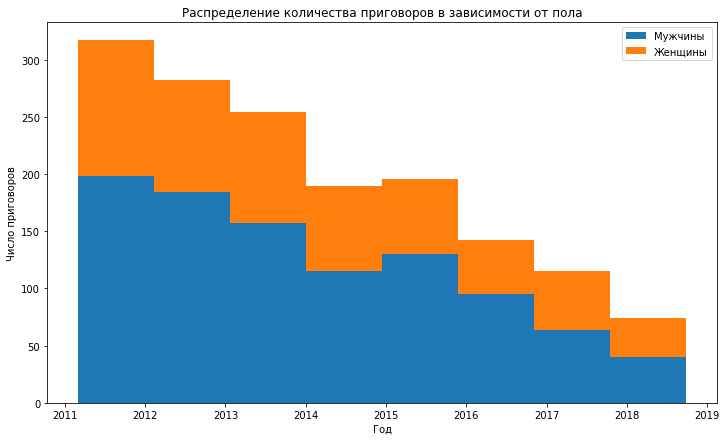

In [89]:
plt.hist([men_df[2],women_df[2]], stacked = True, bins = 8)
plt.legend(labels=['Мужчины','Женщины'])
plt.title('Распределение количества приговоров в зависимости от пола')
plt.ylabel('Число приговоров')
plt.xlabel('Год')

Посчитаем, какие дают сроки. Для примера выберем исправительные работы.

In [383]:
total = 0
total_sent = 0
total_works = 0

sentences_men = []

for men_ in men:
    total += 1
    
    
    data = men_[3].lower().split()
    
    i = 0
    for token in data:
        i += 1
        if token == 'наказание':
            if 'виде' in (data[i:i+40]):
                total_sent += 1
                ind = data[i:i+40].index('виде')
                if 'исправительных' in data[i:i+40][ind:ind+20]:
                    #print(data[i:i+40][ind:ind+20])
                    years = 0
                    months = 0
                    
                    numbers = {
                        1:['один','одного'],
                        2:['два','двух'],
                        3:['три','трех','трёх'],
                        4:['четыре','четырех','четырёх'],
                        5:['пять','пяти'],
                        6:['шесть','шести'],
                        7:['семь','семи'],
                        8:['восемь','восьми'],
                        9:['девять','девяти'],
                        10:['десять','десяти'],
                        11:['одиннадцать','одиннадцати']
                    }
                    
                    for number in numbers:
                        numbers[number].append(str(number))
                        
                        cache = []
                        for token in numbers[number]:
                            cache.append(token+")")
                            cache.append("("+token+")")
                            cache.append("("+token)

                    if 'год' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('год')-3:
                                                       data[i:i+40][ind:ind+20].index('год')+1]]):
                                years = key
                    
                    if 'года' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('года')-3:
                                                       data[i:i+40][ind:ind+20].index('года')+1]]):
                                years = key


                    if 'месяцев' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('месяцев')-3:
                                                       data[i:i+40][ind:ind+20].index('месяцев')+1]]):
                                months = key
                                
                    if 'месяца' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('месяца')-3:
                                                       data[i:i+40][ind:ind+20].index('месяца')+1]]):
                                months = key


                    sen = years + months / 12
                    if sen != 0:
                        sentences_men.append(sen)

                    total_works += 1

In [385]:
total = 0
total_sent = 0
total_works = 0

sentences_women = []

for women_ in women:
    total += 1
    
    
    data = women_[3].lower().split()
    
    i = 0
    for token in data:
        i += 1
        if token == 'наказание':
            if 'виде' in (data[i:i+40]):
                total_sent += 1
                ind = data[i:i+40].index('виде')
                if 'исправительных' in data[i:i+40][ind:ind+20]:
                    #print(data[i:i+40][ind:ind+20])
                    years = 0
                    months = 0
                    
                    numbers = {
                        1:['один','одного'],
                        2:['два','двух'],
                        3:['три','трех','трёх'],
                        4:['четыре','четырех','четырёх'],
                        5:['пять','пяти'],
                        6:['шесть','шести'],
                        7:['семь','семи'],
                        8:['восемь','восьми'],
                        9:['девять','девяти'],
                        10:['десять','десяти'],
                        11:['одиннадцать','одиннадцати']
                    }
                    
                    for number in numbers:
                        numbers[number].append(str(number))
                        
                        cache = []
                        for token in numbers[number]:
                            cache.append(token+")")
                            cache.append("("+token+")")
                            cache.append("("+token)

                    if 'год' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('год')-3:
                                                       data[i:i+40][ind:ind+20].index('год')+1]]):
                                years = key
                    
                    if 'года' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('года')-3:
                                                       data[i:i+40][ind:ind+20].index('года')+1]]):
                                years = key


                    if 'месяцев' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('месяцев')-3:
                                                       data[i:i+40][ind:ind+20].index('месяцев')+1]]):
                                months = key
                                
                    if 'месяца' in data[i:i+40][ind:ind+20]:
                        for key in numbers:
                            if any([ token in numbers[key] for token in 
                                    data[i:i+40][ind:ind+20][data[i:i+40][ind:ind+20].index('месяца')-3:
                                                       data[i:i+40][ind:ind+20].index('месяца')+1]]):
                                months = key

                    sen = years + months / 12
                    if sen != 0:
                        sentences_women.append(sen)

                    total_works += 1

Text(0, 0.5, 'Чило приговоров (отн. единицы)')

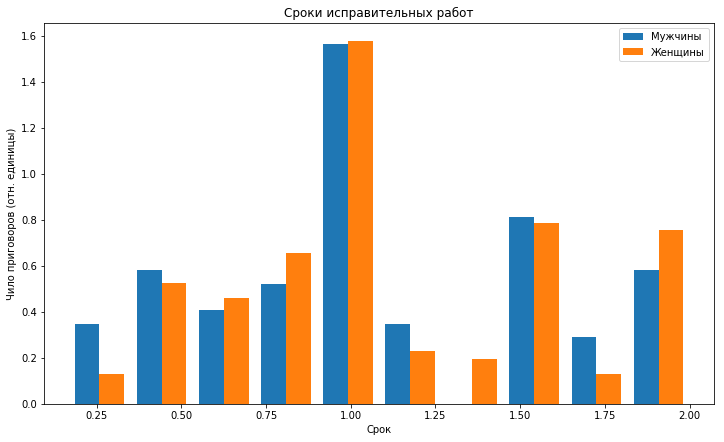

In [387]:
plt.hist((sentences_women, sentences_men), normed = True)
plt.title("Сроки исправительных работ")
plt.xlabel("Срок")
plt.legend(("Мужчины", "Женщины"))
plt.ylabel("Чило приговоров (отн. единицы)")

## Проверка гипотез
Здесь попытался сделать, что-то отличающееся от того, что мы делали на хактоне.
### Сроки исправительных работ в среднем равны

Воспользуемся критерием Стьюдента для несвязных выборок

In [389]:
from scipy import stats

t_stat = stats.ttest_ind(sentences_men,sentences_women)
t_stat

Ttest_indResult(statistic=0.7890510605067123, pvalue=0.4308066502729625)

Видим, что p-value > 0.05, а значит нулевая гипотеза о равенстве сроков не отвергается

Но мы помним, что параметрический критерий Стьюдента требует нормальности выборки. Проверим, что __данные распределены нормально__

In [401]:
stats.shapiro(sentences_men)

(0.9336704015731812, 5.994631919747917e-07)

In [403]:
stats.shapiro(sentences_women)

(0.9471400380134583, 0.0008341763750649989)

Нулевая гипотеза отвергается. То есть они не распределены нормально. Это может быть связано с рядом причин, например небольшим объемом выборки, или достатоно дискретными сроками. Посмотрим на Q-Q график

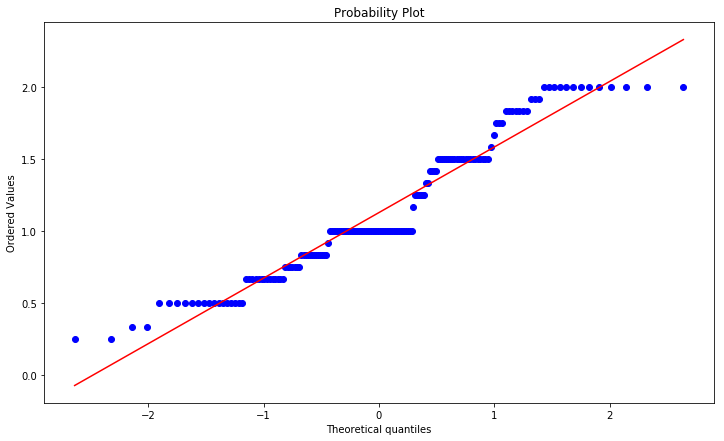

In [404]:
stats.probplot(sentences_men, dist = "norm", plot = plt)
plt.show()

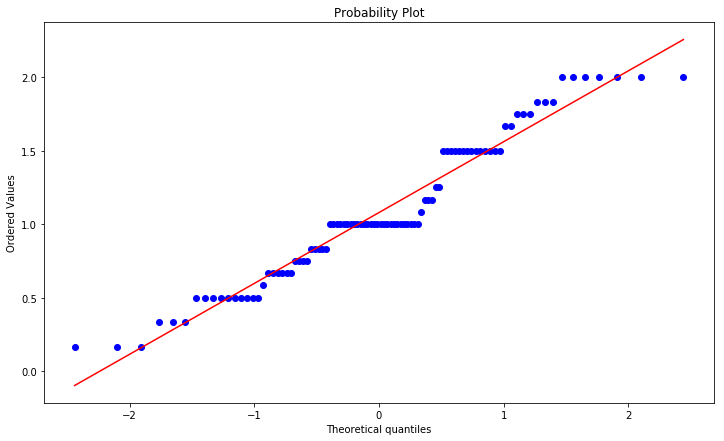

In [405]:
stats.probplot(sentences_women, dist = "norm", plot = plt)
plt.show()

Вообще, с поправкой на дискретность, распределение выглядит нормальным

В любом случае, воспользуемся непараметрическим критерием Манна — Уитни

In [399]:
stats.mannwhitneyu(sentences_men, sentences_women, alternative = 'two-sided')

MannwhitneyuResult(statistic=8134.0, pvalue=0.5637533744541681)

Нулевая гипотеза не отвергается, что соответствует результатам t-теста

## Предсказание временного ряда

Попытаемся предсказать число решений на 2019 год.

Сгруппируем по месяцам

In [135]:
df['year'] = df[2].dt.year
df['month'] = df[2].dt.month

In [163]:
from datetime import datetime

In [181]:
index_ = []
for index, row in df.groupby(by=['year','month',]).count().iterrows():
    index_.append(datetime(year = index[0], month = index[1], day = 1))

In [182]:
len(index_)

91

In [189]:
time_ser = df.groupby(by=['year','month',]).count().reset_index()
time_ser.index = index_
time_ser.drop(columns=['year','month',1,2,3,4], inplace = True)

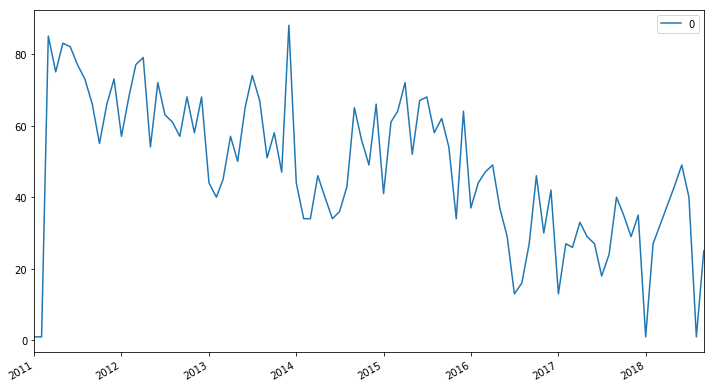

In [191]:
time_ser.plot()

Удалим крайние значения и посчитаем разность

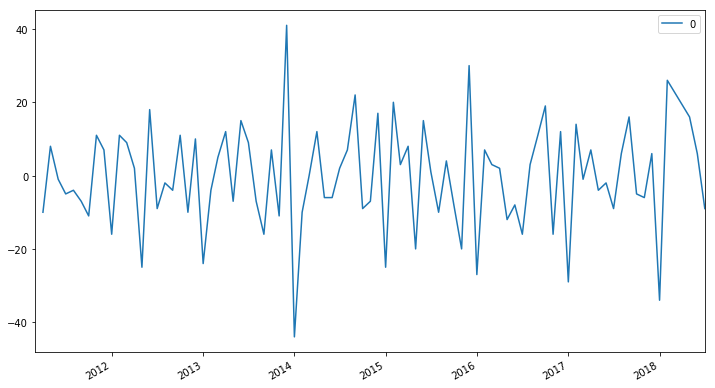

In [196]:
time_ser[2:-2].diff().plot()

In [197]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

Очевидно, что исходный ряд не стационарен, просто проверим:

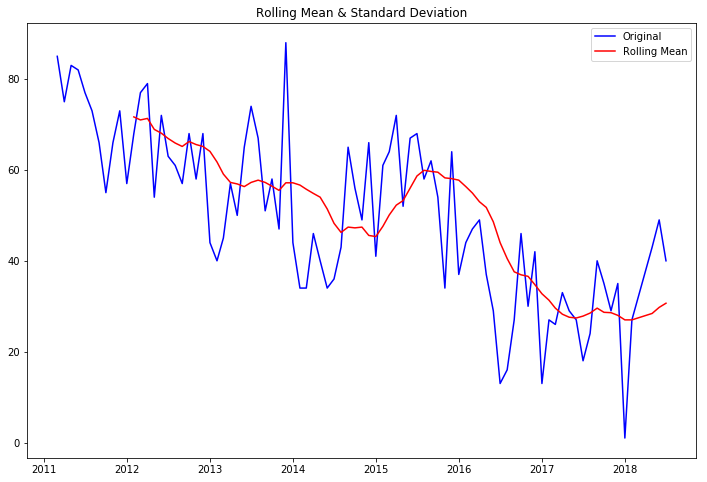

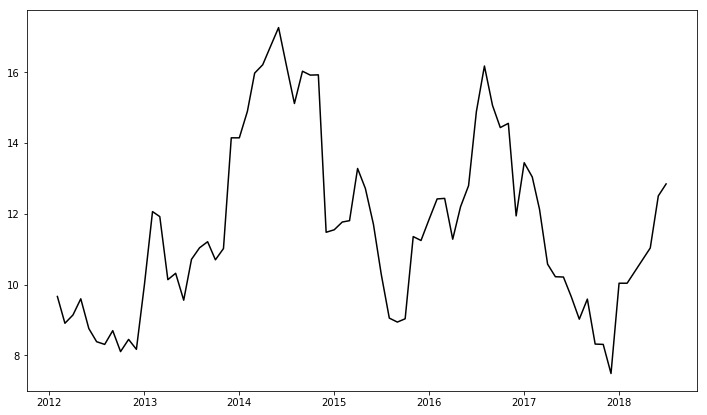

Results of Dickey-Fuller Test:
p-value = 0.4648. The series is likely non-stationary.
Test Statistic                 -1.635186
p-value                         0.464777
#Lags Used                     12.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [199]:
test_stationarity(time_ser[2:-2][0])

Разность один раз не помогает

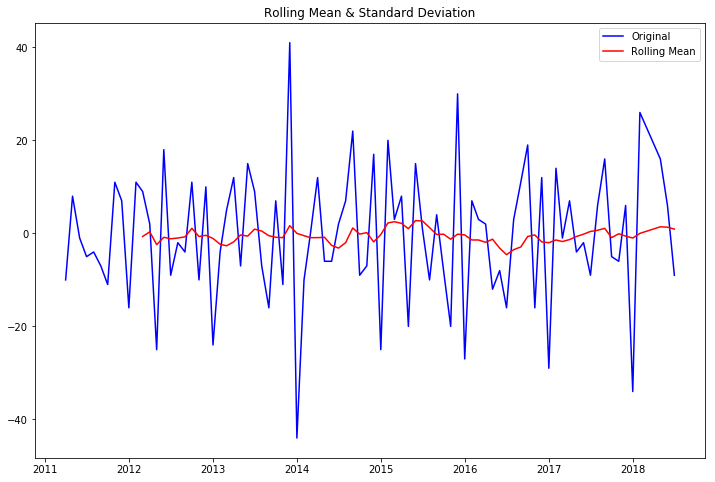

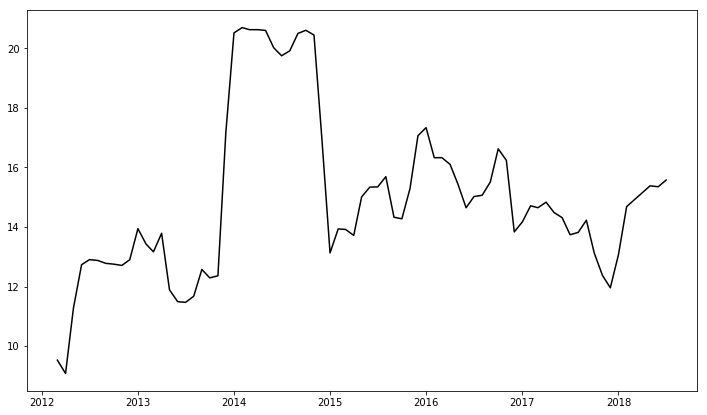

Results of Dickey-Fuller Test:
p-value = 0.1122. The series is likely non-stationary.
Test Statistic                 -2.513459
p-value                         0.112234
#Lags Used                     11.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [201]:
test_stationarity(time_ser[2:-2][0].diff()[1:])

А вот вторая производная помогла

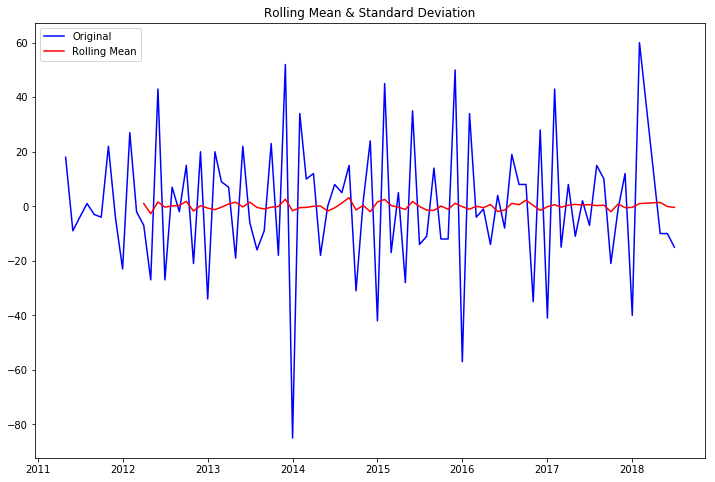

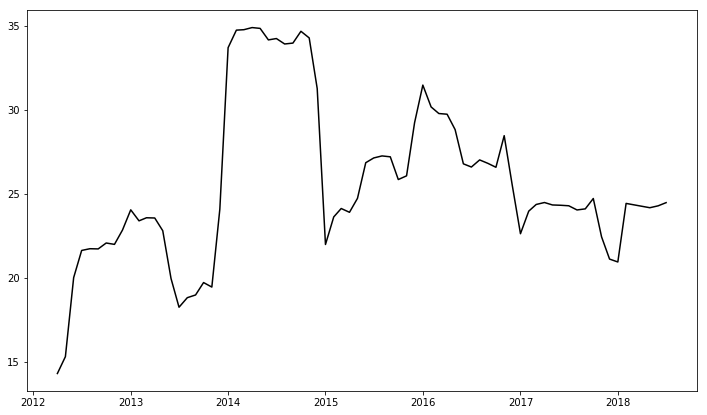

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                 -5.488501
p-value                         0.000002
#Lags Used                     10.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [206]:
test_stationarity(time_ser[2:-2][0].diff().diff()[2:])

In [207]:
double_diff = time_ser[2:-2][0].diff().diff()[2:]

/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


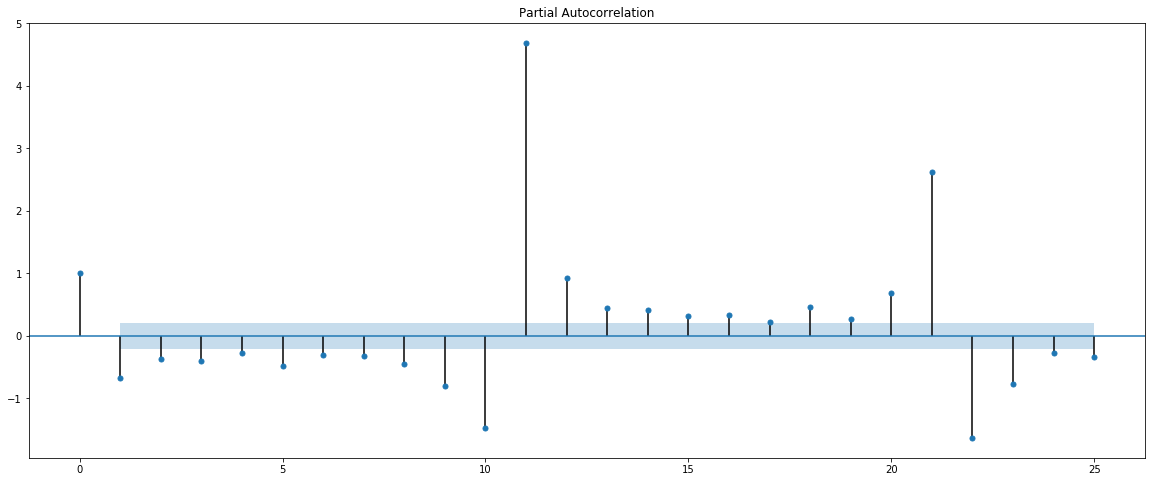

In [208]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(double_diff.values, lags=25,ax = ax)
plt.show()

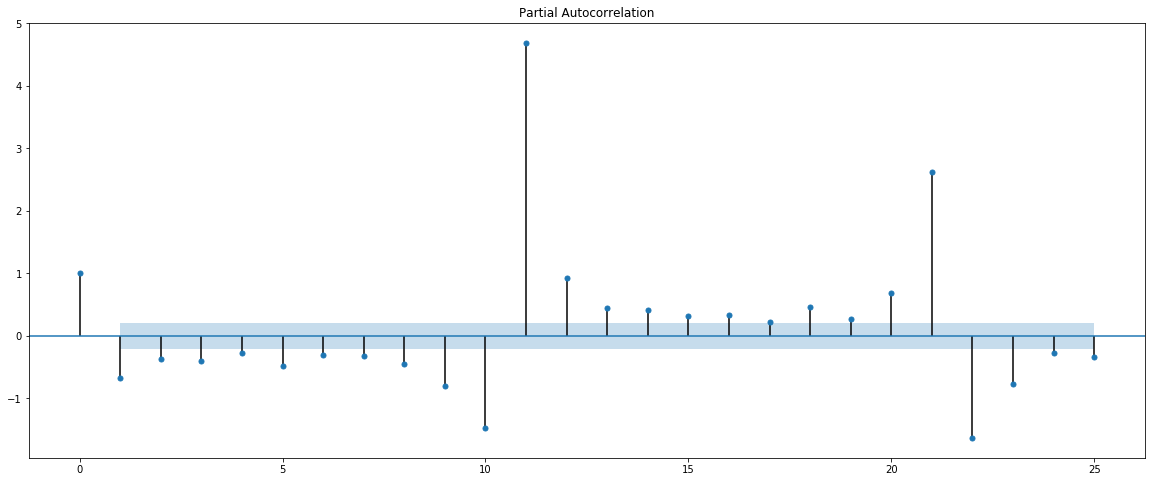

In [210]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(double_diff.values, lags=25,ax = ax)
plt.show()

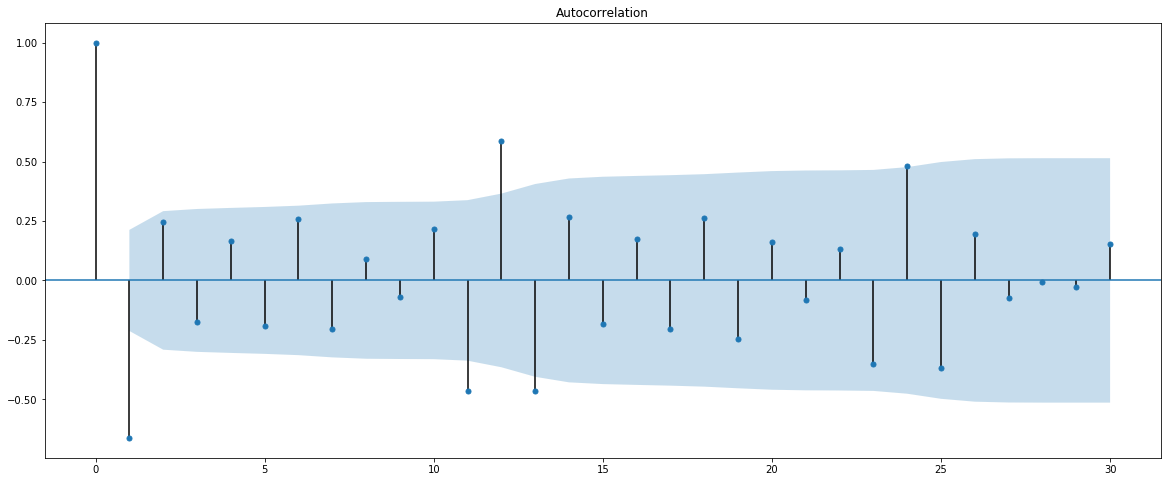

In [212]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(double_diff.values, lags=30,ax = ax)
plt.show()

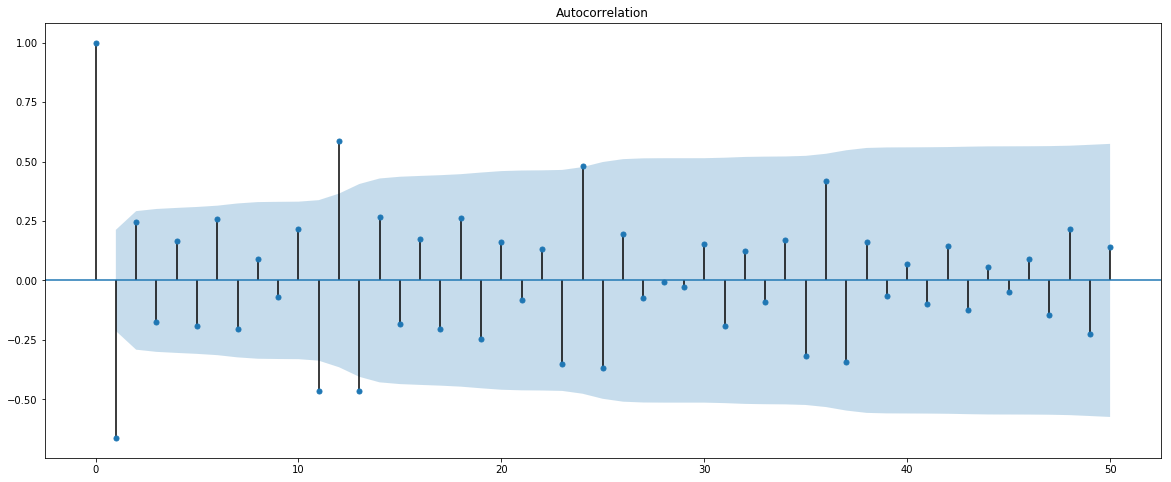

In [213]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(double_diff.values, lags=50,ax = ax)
plt.show()

In [313]:
d = 2
D = 0
s = 12

ps = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
Qs = range(0, 3)

In [314]:
from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

81

In [337]:
TRAIN_SPLIT = 70

In [338]:
%%time
import warnings
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(time_ser[5:TRAIN_SPLIT], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

CPU times: user 10.9 s, sys: 878 ms, total: 11.8 s
Wall time: 5.94 s


In [339]:
print(best_model.summary().tables[0])
print(best_model.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  0   No. Observations:                   65
Model:             SARIMAX(0, 2, 2)x(2, 0, 0, 12)   Log Likelihood                -248.099
Date:                            Mon, 13 May 2019   AIC                            506.198
Time:                                    21:44:52   BIC                            516.913
Sample:                                06-01-2011   HQIC                           510.412
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4138     18.042     -0.078      0.938     -36.775      33.947
ma.L2          0.4139      7.441   

С остатками все почти хорошо, однако есть выбросы в начале и в конце, что связано с особенностями получения данных.

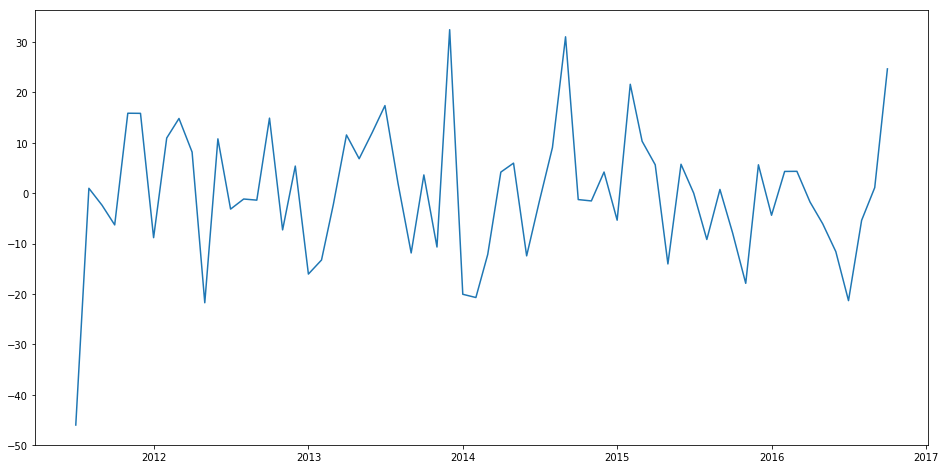

In [340]:
plt.figure(figsize=(16,8))
plt.plot(best_model.resid[1:])
plt.show()

In [341]:
stat_test = sm.tsa.adfuller(best_model.resid[:])
print ('adf: ', stat_test[0] )
print ('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0]> stat_test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -12.1048252138205
p-value:  1.9800413028912741e-22
Critical values:  {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
единичных корней нет, ряд стационарен


Сделаем прогноз

In [342]:
forecast = best_model.predict(start = TRAIN_SPLIT-5, end = len(time_ser[5:])+16)

/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Посмотрим насколько хорошо мы справились

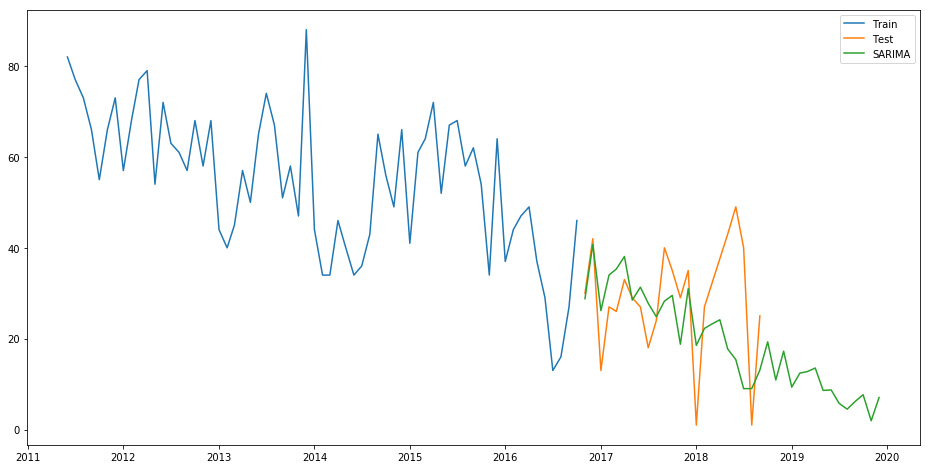

In [409]:
plt.figure(figsize=(16,8))
plt.plot(time_ser[5:TRAIN_SPLIT], label='Train')
plt.plot(time_ser[TRAIN_SPLIT:], label='Test')
plt.plot(forecast, label='SARIMA')

plt.legend(loc='best')
plt.show()

Видим, что дисперсия самих данных описывается очень плохо, но при этом сам тренд модель определяет хорошо. Да и вообще круто, что с каждым годом все меньше людей будут осуждать по этой статье :)

# Выводы
1. Мужчинам и женщинам выносят одинаковые по длительности приговоры об исправительных работах
2. Прогнозируем снижение количество приговоров по статье 108. Однако, возможно, что просто количество доступных приговоров снижеается, а их остается все также много